# Análise de Dados Magalu

## Análise de Dados de Smartphones, Notebooks e Smart TVs

### Análise de Dados: Smartphones

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('output/dataset_smartphone.csv', sep=';')

In [97]:
df.head()

,descricao,preco,avaliacao,quantidade_avaliacoes,URL
0,"iPhone 11 Apple 64GB Roxo 6,1” 12MP iOS",3719.07,5,1,https://www.magazineluiza.com.br/iphone-11-app...
1,Smartphone Samsung Galaxy S20 FE 128GB Cloud Mint,2249.00,4,48,https://www.magazineluiza.com.br/smartphone-sa...
2,"iPhone 11 Apple 64GB (PRODUCT)RED 6,1” 12MP iOS",3719.07,4,19,https://www.magazineluiza.com.br/iphone-11-app...
3,"iPhone 11 Apple 64GB Preto 6,1” 12MP iOS",3719.07,4,80,https://www.magazineluiza.com.br/iphone-11-app...
4,Smartphone Samsung Galaxy S20 FE 128GB Cloud W...,2249.00,4,51,https://www.magazineluiza.com.br/smartphone-sa...


In [98]:
df.count()

descricao                1012
preco                     981
avaliacao                1012
quantidade_avaliacoes    1012
URL                      1012
dtype: int64

## Verificação de Valores Nulos: NaN

In [99]:
df.isnull().sum().sum()

31

In [100]:
df['preco'].isnull().sum()

31

A coluna de preços contém valores nulos. É melhor excluir esses registros do que substituir por um valor de preço = 0

In [101]:
df = df.dropna()

In [102]:
df.count()

descricao                981
preco                    981
avaliacao                981
quantidade_avaliacoes    981
URL                      981
dtype: int64

Agora os registros com preço nulo foram excluídos do dataframe

## Estatística descritiva

Seguem algumas estatísticas descritivas relativas aos smartphones:

In [103]:
df.describe()

,preco,avaliacao,quantidade_avaliacoes
count,981.000000,981.000000,981.000000
mean,1878.461651,4.627931,7.299694
std,1818.894737,0.722238,25.489251
min,74.910000,1.000000,0.000000
25%,888.000000,4.000000,0.000000
50%,1300.550000,5.000000,0.000000
75%,2177.970000,5.000000,2.000000
max,15414.180000,5.000000,274.000000


## Histograma: Distribuição de Frequencias

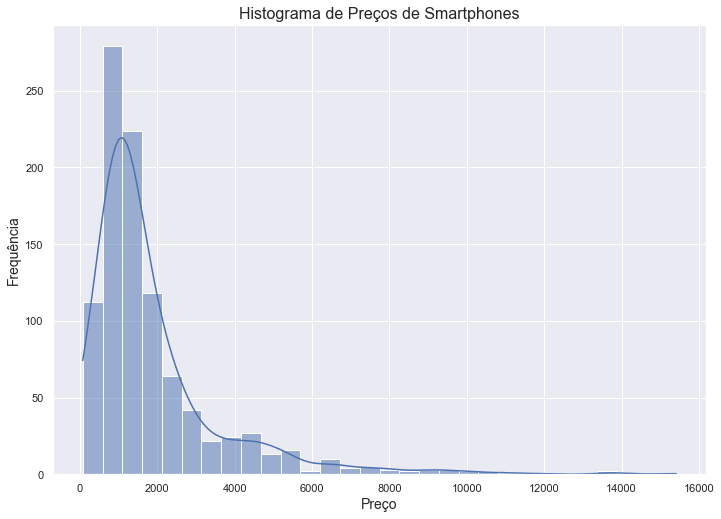

In [142]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Smartphones", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

A distribuição é fortemente assimétrica dada a presença de outliers

## Boxplot: Visualização de outliers

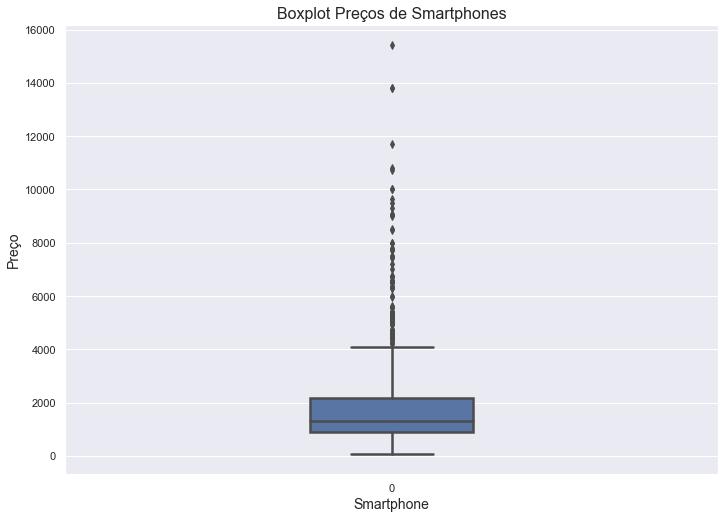

In [131]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços de Smartphones", fontsize=16)
boxplot.set_xlabel("Smartphone", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Remoção de Outliers

Percebe-se que há outliers no departamento de smartphones.

Podem ser acessórios para smartphones com preços muito baixos, ou celulares com preços muito acima da média

Haverá agora um trabalho de remoção de outliers do nosso dataset

### Função que retira os indices dos outliers do nosso dataframe

In [105]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

In [106]:
# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)
index_list = []
for feature in ['preco', 'quantidade_avaliacoes']:
    index_list.extend(outliers_indexes(df, feature))

Será usada uma versão mais simples, apenas para retornar os índices de uma única coluna, o preço

In [107]:
outliers_index_list = outliers_indexes(df, 'preco')

In [108]:
outliers_index_list

Int64Index([127, 131, 141, 153, 163, 164, 171, 189, 193, 194, 210, 218, 220,
            221, 249, 259, 262, 275, 277, 297, 300, 305, 310, 311, 326, 333,
            335, 340, 342, 353, 382, 391, 397, 421, 440, 444, 451, 458, 465,
            468, 486, 491, 503, 505, 511, 514, 518, 520, 530, 532, 538, 555,
            560, 563, 569, 601, 621, 623, 639, 649, 668, 675, 676, 680, 682,
            708, 712, 717, 721, 730, 733, 751, 759, 760, 767, 768, 769, 778,
            809, 811, 826, 827, 858, 864, 866, 874, 885, 915, 929, 935, 941,
            946, 952, 964, 968, 997],
           dtype='int64')

In [109]:
len(outliers_index_list)

96

### Função de Remoção de Outliers

Por fim, define-se uma função para a remoção de todos os registros que contém outliers, tendo a lista de índices como input

In [110]:
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df   

### Limpa-se o dataframe dos outliers

In [111]:
df_clean = remove_outliers(df, outliers_index_list)

In [112]:
df_clean.shape

(885, 5)

Foram removidos 96 registros, exatamente como esperado

## Histograma: Distribuição de Frequência (Outliers removidos)

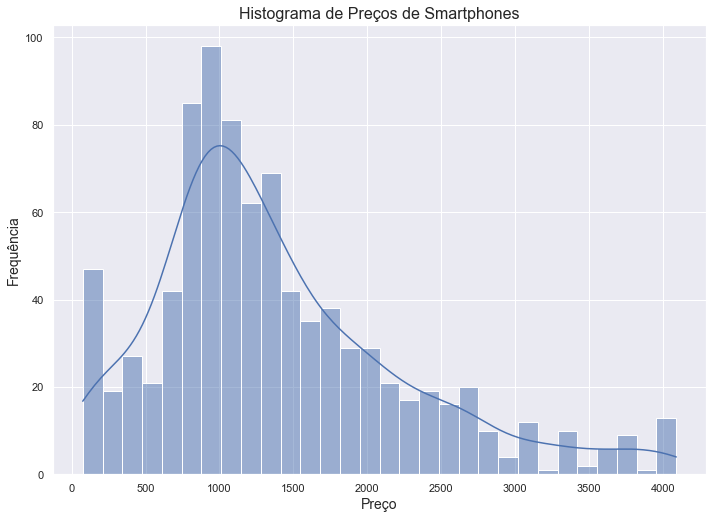

In [143]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Smartphones", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

Nota-se maior simetria na distribuição após a remoção dos outliers, ainda que esta não seja uma distribuição Gaussiana

## Boxplot sem Outliers

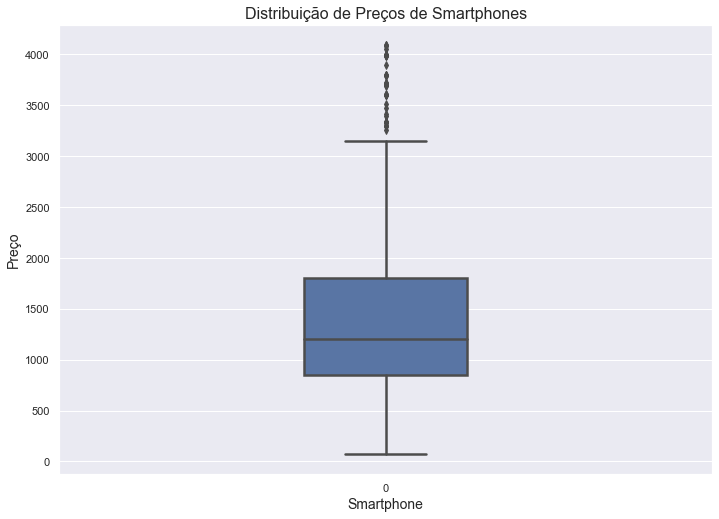

In [113]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df_clean['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Distribuição de Preços de Smartphones", fontsize=16)
boxplot.set_xlabel("Smartphone", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

## Estatística descritiva, sem outliers

In [94]:
df_clean.describe()

,preco,avaliacao,quantidade_avaliacoes
count,885.000000,885.000000,885.000000
mean,1395.617288,4.597740,8.004520
std,849.422109,0.745116,26.715867
min,74.910000,1.000000,0.000000
25%,845.100000,4.000000,0.000000
50%,1199.000000,5.000000,0.000000
75%,1804.990000,5.000000,3.000000
max,4091.070000,5.000000,274.000000


Verifica-se assim que:
 - A média de preço de um Smartphone está em torno de 1400 reais, com 850,00 reais para mais ou para menos
 - A Mediana do preço de um smartphone é 1200 reais
 - A média de quantidade de avaliações é 8 por produto. A baixa quantidade pode indicar que essa medida não é confiável

## Item Mais Caro (Outliers não removidos)

In [119]:
df_mask = df['preco']==max(df['preco'])
filtered_df = df[df_mask]
print(filtered_df)

                                             descricao     preco  avaliacao  \
717  Smartphone Samsung Galaxy Z Fold 2 256GB  - My...  15414.18          5   

     quantidade_avaliacoes                                                URL  
717                      0  https://www.magazineluiza.com.br/smartphone-sa...  


## Item Mais Caro (Outliers Removidos)

In [116]:
df_mask = df_clean['preco']==max(df_clean['preco'])
filtered_df = df_clean[df_mask]
print(filtered_df)

                                     descricao    preco  avaliacao  \
11  iPhone 11 Apple 128GB Branco 6,1” 12MP iOS  4091.07          4   
20   iPhone 11 Apple 128GB Preto 6,1” 12MP iOS  4091.07          4   

    quantidade_avaliacoes                                                URL  
11                     38  https://www.magazineluiza.com.br/iphone-11-app...  
20                     48  https://www.magazineluiza.com.br/iphone-11-app...  


## Item mais barato

In [120]:
df_mask = df_clean['preco']==min(df_clean['preco'])
filtered_df = df_clean[df_mask]
print(filtered_df)

                                             descricao  preco  avaliacao  \
756  Celular Barra Dual Chip com Câmera Mp3 e Bluet...  74.91          5   

     quantidade_avaliacoes                                                URL  
756                      0  https://www.magazineluiza.com.br/celular-barra...  


## 5 itens com preço menor ou igual a média

In [127]:
df_mask = df_clean['preco']<=df_clean['preco'].mean()
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=False)[:5])

                                             descricao    preco  avaliacao  \
654  Smartphone Motorola Moto G30 128GB 4GB RAM  Câ...  1394.90          5   
344  Smartphone Motorola Moto G30 128GB 4GB RAM  Câ...  1394.90          5   
743  Smartphone Motorola XT2129 Moto G30 6.5" 2.0GH...  1394.07          5   
292  Smartphone Samsung Galaxy A32 128GB 4G Wi-Fi T...  1394.07          5   
97   Smartphone Xiaomi Redmi 9 64GB Cinza 4G Octa-Core  1394.07          4   

     quantidade_avaliacoes                                                URL  
654                      1  https://www.magazineluiza.com.br/smartphone-mo...  
344                      2  https://www.magazineluiza.com.br/smartphone-mo...  
743                      2  https://www.magazineluiza.com.br/smartphone-mo...  
292                      0  https://www.magazineluiza.com.br/smartphone-sa...  
97                       9  https://www.magazineluiza.com.br/smartphone-xi...  


Estes itens são considerados mid-range e tem uma boa relação custo-benefício.